In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
file_path = 'winequality-red.csv'  # Replace with the correct file path
wine_df = pd.read_csv(file_path)

# Display the first few rows to confirm data is loaded
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Mean values by quality:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.0849

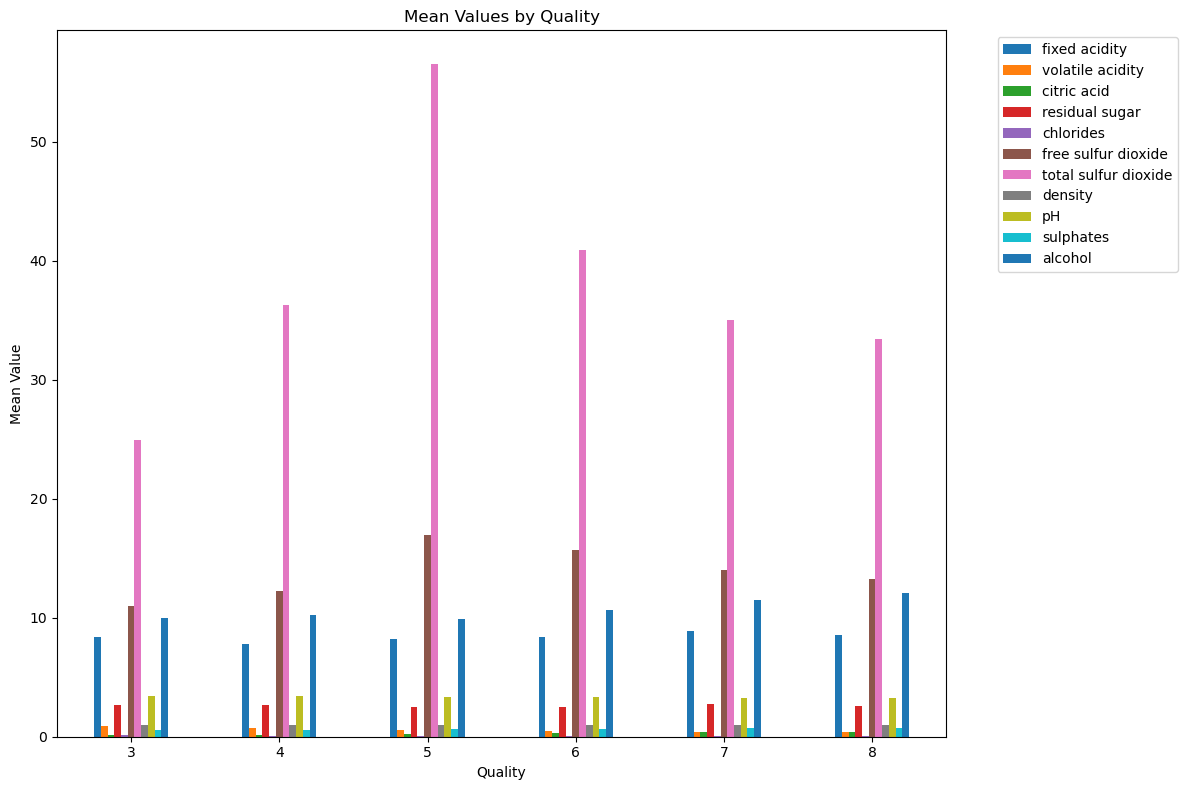

In [3]:
# Calculate the mean values for all columns grouped by quality
correlation_analysis_quality = wine_df.groupby('quality').mean()

# Display the results
print("Mean values by quality:")
print(correlation_analysis_quality)

# Visualize the relationships with bar plots
correlation_analysis_quality.plot(kind='bar', figsize=(12, 8), title="Mean Values by Quality", ylabel="Mean Value")
plt.xlabel("Quality")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Mean acidity values by quality:
         fixed acidity  volatile acidity  citric acid
quality                                              
3             8.360000          0.884500     0.171000
4             7.779245          0.693962     0.174151
5             8.167254          0.577041     0.243686
6             8.347179          0.497484     0.273824
7             8.872362          0.403920     0.375176
8             8.566667          0.423333     0.391111


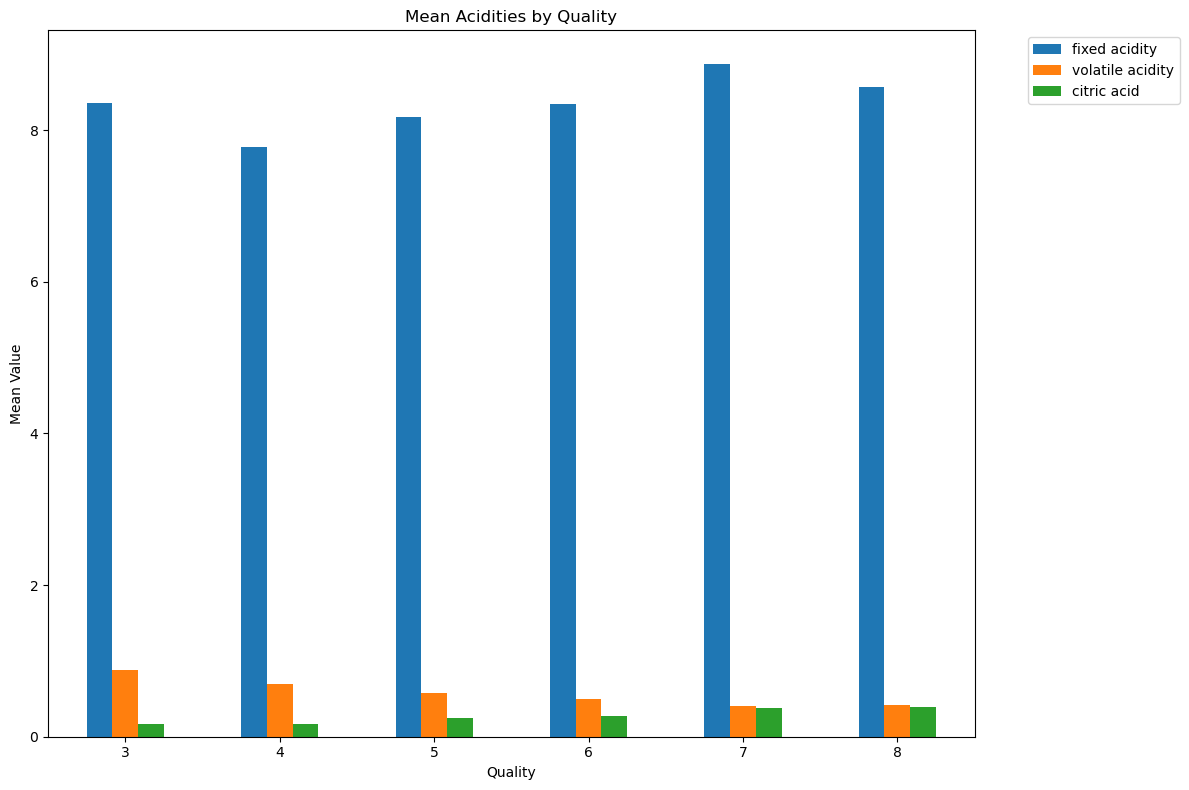

In [4]:
# Calculate the mean values for acid columns grouped by quality
correlation_analysis_acids = wine_df.groupby('quality')[['fixed acidity', 'volatile acidity', 'citric acid']].mean()

# Display the results
print("Mean acidity values by quality:")
print(correlation_analysis_acids)

# Visualize the relationships with bar plots
correlation_analysis_acids.plot(kind='bar', figsize=(12, 8), title="Mean Acidities by Quality", ylabel="Mean Value")
plt.xlabel("Quality")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()

In [5]:
# Select acid columns as features
X = wine_df[['fixed acidity', 'volatile acidity', 'citric acid']]

# Define the target variable
y = wine_df['quality']

In [6]:
# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to balance the dataset
X_res, y_res = smote.fit_resample(X, y)

In [7]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)


In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing set
X_test_scaled = scaler.transform(X_test)

In [9]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 0.41


In [10]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.72


In [11]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.78


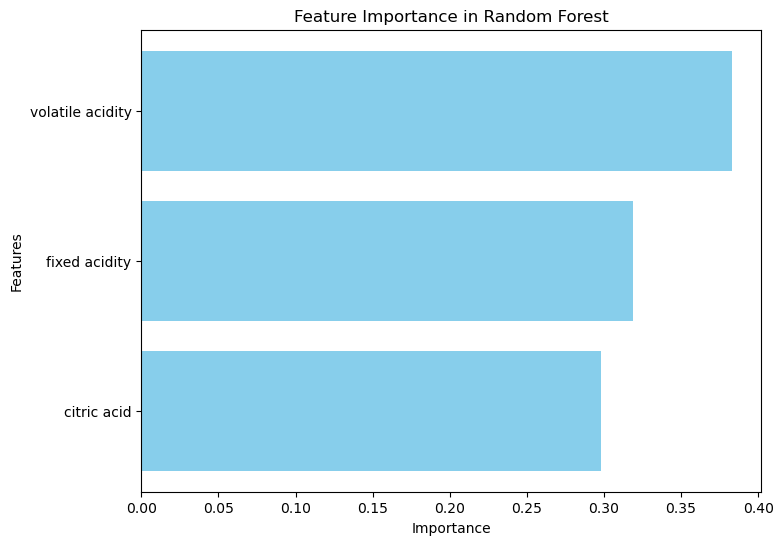

            Feature  Importance
1  volatile acidity    0.382872
0     fixed acidity    0.319151
2       citric acid    0.297977


In [12]:
# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display sorted importance
print(importance_df)

In [ ]:
# Filter high-quality predictions
high_quality_indices = [i for i, pred in enumerate(y_pred_rf) if pred == 8] 
high_quality_wines = X_test.iloc[high_quality_indices]

# Display the mean values of acid levels for high-quality predictions
print("Optimal Acid Levels for High-Quality Wine:")
print(high_quality_wines.mean())

Optimal Acid Levels for High-Quality Wine:
fixed acidity       8.295652
volatile acidity    0.416990
citric acid         0.371611
dtype: float64


In [ ]:
# Filter medium-quality predictions
medium_quality_indices = [i for i, pred in enumerate(y_pred_rf) if pred in [5, 6, 7]]  
medium_quality_wines = X_test.iloc[medium_quality_indices]

# Display the mean values of all features for medium-quality predictions
print("Optimal Acid Levels for Medium-Quality Wine:")
print(medium_quality_wines.mean())

Optimal Acid Levels for Medium-Quality Wine:
fixed acidity       8.357173
volatile acidity    0.492967
citric acid         0.296870
dtype: float64


In [ ]:
# Filter medium-quality predictions
low_quality_indices = [i for i, pred in enumerate(y_pred_rf) if pred in [3, 4]] 
low_quality_wines = X_test.iloc[low_quality_indices]

# Display the mean values of all features for medium-quality predictions
print("Optimal Acid Levels for Low-Quality Wine:")
print(low_quality_wines.mean())

Optimal Acid Levels for Low-Quality Wine:
fixed acidity       8.011342
volatile acidity    0.815877
citric acid         0.144134
dtype: float64


In [ ]:
# Generate synthetic acid combinations
fixed_acidity = np.linspace(X['fixed acidity'].min(), X['fixed acidity'].max(), 100)
volatile_acidity = np.linspace(X['volatile acidity'].min(), X['volatile acidity'].max(), 100)
citric_acid = np.linspace(X['citric acid'].min(), X['citric acid'].max(), 100)

# Create a grid of synthetic data
synthetic_data = pd.DataFrame({
    'fixed acidity': np.random.choice(fixed_acidity, 1000),
    'volatile acidity': np.random.choice(volatile_acidity, 1000),
    'citric acid': np.random.choice(citric_acid, 1000)
})

# Predict quality for synthetic data
synthetic_data_scaled = scaler.transform(synthetic_data)
synthetic_predictions = rf.predict(synthetic_data_scaled)

# Filter high-quality predictions
high_quality_synthetic = synthetic_data[synthetic_predictions == 8] 

# Find the mean acid levels for "perfect" high-quality wine
print("Perfect Acid Blend:")
print(high_quality_synthetic.mean())

Perfect Acid Blend:
fixed acidity       9.226532
volatile acidity    0.552101
citric acid         0.603030
dtype: float64
